<a href="https://colab.research.google.com/github/RodrigoLima82/Tensorflow2.0/blob/master/Rede_Neural_Convolucional_no_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1: Instando o TensorFlow 2.0

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 83kB/s 
     |████████████████████████████████| 419kB 65.4MB/s 
     |████████████████████████████████| 3.0MB 51.5MB/s 


## Etapa 2: Importando as bibliotecas

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0-alpha0'

## Etapa 3: Pré-processamento

### Carregando a base de dados Cifar10

In [0]:
# Configurando o nome das classes que serão previstas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
# Carregando a base de dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Normalização das imagens

In [0]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [0]:
X_train = X_train / 255.0

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

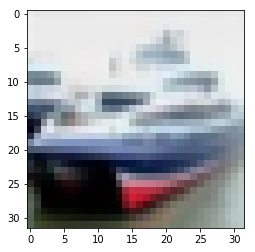

In [0]:
plt.imshow(X_test[1])

## Etapa 4: Construindo a Rede Neural Convolucional

### Definindo o modelo

In [0]:
model = tf.keras.models.Sequential()

### Adicionado a primeira camada de convolução

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel): 3
- padding (preenchimento): same
- função de ativação: relu
- input_shape (camada de entrada): (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adicionando a segunda camada de convolução e a camada de max-pooling

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel):3
- padding (preenchimento): same
- função de ativação: relu

Hyper-parâmetros da camada de max-pooling:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adicionando a terceira camada de convolução

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adicionando a quarta camada de convolução e a camada de max pooling

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

Hyper-parâmetros da camada de max pooling:

    pool_size: 2
    strides: 2
    padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adicionando a camada de flattening

In [0]:
model.add(tf.keras.layers.Flatten())

### Adicionando a primeira camada densa (fully-connected)

Hyper-parâmetros da camada densa:
- units/neurônios: 128
- função de ativação: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adicionando a camada de saída

Hyper-parâmetros da camada de saída:

 - units/neurônios: 10 (número de classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compilando o modelo

#### sparse_categorical_accuracy

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
# 0 0 0 1 0 0 0 0 0 0
y_test[0]

array([3])

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Treinando o modelo

In [0]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 14s 273us/sample - loss: 1.3579 - sparse_categorical_accuracy: 0.5108
Epoch 2/5
50000/50000 [==============================] - 9s 187us/sample - loss: 0.9064 - sparse_categorical_accuracy: 0.6806
Epoch 3/5
50000/50000 [==============================] - 9s 187us/sample - loss: 0.7285 - sparse_categorical_accuracy: 0.7440
Epoch 4/5
50000/50000 [==============================] - 9s 186us/sample - loss: 0.6135 - sparse_categorical_accuracy: 0.7850
Epoch 5/5
50000/50000 [==============================] - 9s 189us/sample - loss: 0.5071 - sparse_categorical_accuracy: 0.8214


### Avaliando o modelo

In [0]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 105us/sample - loss: 0.8045 - sparse_categorical_accuracy: 0.7390


In [0]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7390000224113464


In [0]:
test_loss

0.8044558694839478